In [4]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

xls = pd.ExcelFile("C:\\pythonProject1\\Gruppenprojekt\\Aufgabe 5 - Shop Analyse.xlsx")
df1 = pd.read_excel(xls, 'P1')
df2 = pd.read_excel(xls, 'P2')
df3 =pd.read_excel(xls, 'P3')

In [6]:
df3

,Datum,Umsatz
0,Jan,148945.166650
1,Feb,128859.949494
2,Mrz,141602.709028
3,Apr,133780.491099
4,Mai,135993.779232
5,Jun,135206.767009
6,Jul,143531.783519
7,Aug,139714.627028
8,Sep,130178.025891
9,Okt,128966.717912


In [7]:
xl_de = pd.ExcelFile("C:\\pythonProject1\\Gruppenprojekt\\Aufgabe 5 - Shop Analyse.xlsx")
combined = pd.concat([xl_de.parse(sheet) for sheet in xl_de.sheet_names], ignore_index=True)
combined

,Datum,Umsatz
0,Jan,148945.166650
1,Feb,128859.949494
2,Mrz,141602.709028
3,Apr,133780.491099
4,Mai,135993.779232
5,Jun,135206.767009
6,Jul,143531.783519
7,Aug,139714.627028
8,Sep,130178.025891
9,Okt,128966.717912


In [8]:
csv = pd.read_csv("C:\\pythonProject1\\Gruppenprojekt\\Aufgabe 5 - Shopauswertung.csv", sep=";")
csv

,Datum,Produkt,Umsatz
0,01.01.2021,A,17.132115
1,02.01.2021,A,57.353725
2,03.01.2021,A,114.746857
3,04.01.2021,A,113.251181
4,05.01.2021,A,4.186462
...,...,...,...
1090,27.12.2021,A+B+C,197909.241600
1091,28.12.2021,A+B+C,198014.840500
1092,29.12.2021,A+B+C,198355.276000
1093,30.12.2021,A+B+C,199081.446100


In [9]:
def best_prices(Umsatz):
    lowest_prices=[]
    price_list=[]
    for i in Umsatz:
            if i==[1]:
                store_min=min(price_list)
                print(store_min)
                print(price_list)
    return lowest_prices
best_prices("Umsatz")



[]

In [10]:
df1["Umsatz"].compare(csv['Umsatz'], result_names=("p1", "p2"))

ValueError: Can only compare identically-labeled Series objects

In [ ]:
import matplotlib.pyplot as plot
df1.plot.bar()
plot.title("Umsatz P1")
plot.xlabel("Monat")
plot.ylabel("Umsatz")
plot.savefig("Umsatz P1.png")

In [ ]:
import matplotlib.pyplot as plot
df2.plot.bar()
plot.title("Umsatz P2")
plot.xlabel("Monat")
plot.ylabel("Umsatz")
plot.savefig("Umsatz P2.png")

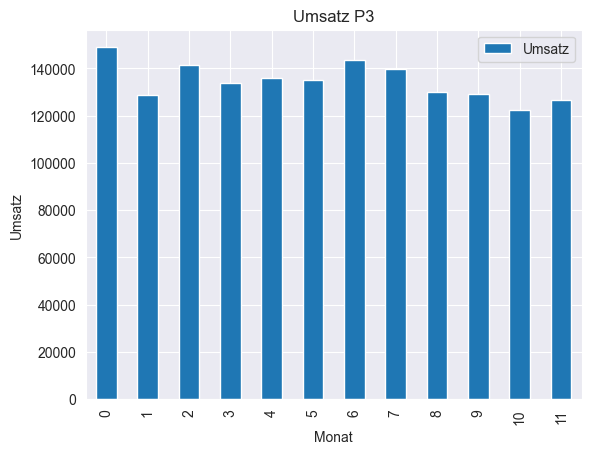

In [21]:
import matplotlib.pyplot as plot
df3.plot.bar()
plot.title("Umsatz P3")
plot.xlabel("Monat")
plot.ylabel("Umsatz")
plot.savefig("Umsatz P3.png")

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1["Datum"], df1["Umsatz"], label = "Umsatz P1")
plt.plot(df2["Datum"], df2["Umsatz"], label = "Umsatz P2")
plt.plot(df3["Datum"], df3["Umsatz"], label = "Umsatz P3")
plt.legend()
plt.show()

NameError: name 'plot' is not defined

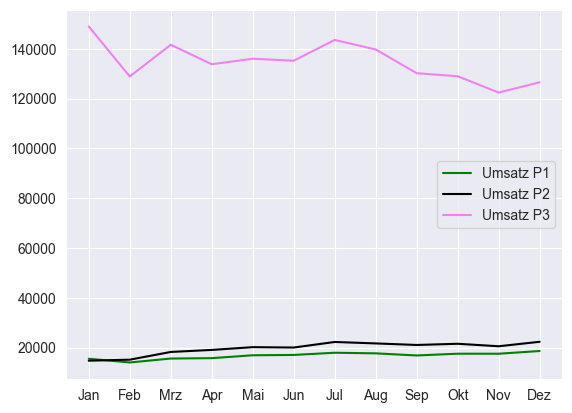

In [20]:
import matplotlib.pyplot as plt
plt.plot(df1["Datum"], df1["Umsatz"], label = "Umsatz P1", color="green")
plt.plot(df2["Datum"], df2["Umsatz"], label = "Umsatz P2", color="black")
plt.plot(df3["Datum"], df3["Umsatz"], label = "Umsatz P3",color="violet")
plt.legend()
#plt.show()
plot.savefig("3Produkten DE.png")

In [30]:
import pandas as pd

df_eu = pd.read_csv('C:\\pythonProject1\\Gruppenprojekt\\Aufgabe 5 - Shopauswertung.csv', delimiter=';')

df_eu_pivot = df_eu.pivot(columns='Produkt', index='Datum', values='Umsatz')
df_eu_pivot['C'] = df_eu_pivot['A+B+C'] - df_eu_pivot['A'] - df_eu_pivot['B']

df_eu_pivot = df_eu_pivot.reset_index()
df_eu_pivot = pd.melt(df_eu_pivot, id_vars=['Datum'], value_vars=['A', 'B', 'C'], var_name='Produkt', value_name='Umsatz')
df_eu_pivot['Datum'] = pd.to_datetime(df_eu_pivot['Datum'], format='%d.%m.%Y')
df_eu_pivot['Datum'] = df_eu_pivot['Datum'].dt.strftime('%b')

df_eu_pivot = df_eu_pivot.set_index('Datum')
df_eu_pivot['Region'] = 'EU'

df_eu_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1095 entries, Jan to Dec
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Produkt  1095 non-null   object 
 1   Umsatz   1095 non-null   float64
 2   Region   1095 non-null   object 
dtypes: float64(1), object(2)
memory usage: 34.2+ KB


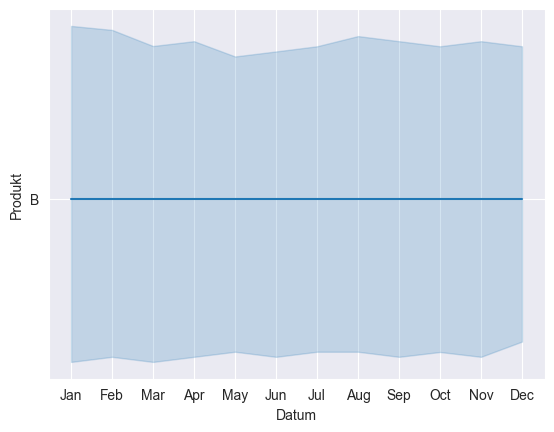

In [31]:
import seaborn as sns

sns.lineplot( x = "Datum",
             y = "Produkt",
             data = df_eu_pivot);
#plot.savefig("De.png")

TypeError: 'method' object is not subscriptable

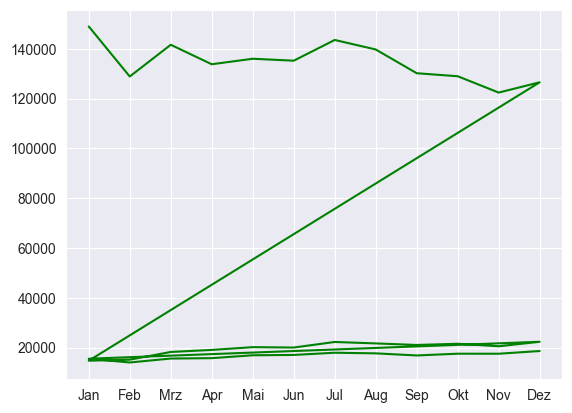

In [29]:
import matplotlib.pyplot as plt
plt.plot(combined["Datum"], combined["Umsatz"], label = "DE", color="green")
plt.plot(df_eu.pivot["Produkt"], df_eu.pivot["Umsatz"], label = "Europa", color="blue")
plt.legend()
plt.show()
#plot.savefig("De und Europa.png")

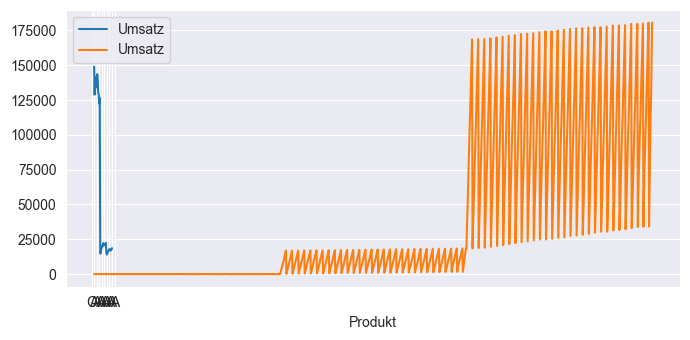

In [37]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = combined.plot(x='Datum', y='Umsatz')
df_eu_pivot.plot(ax=ax, x='Produkt', y='Umsatz')

plt.show()